# Cleaning and visualising data using Python

## Python Project: "Atmospheric Carbon Dioxide Levels"
    
## Name: Luke


---
### The Keeling curve
This project deals with the analysis of atmospheric carbon dioxide levels as measured by the Mauna Loa Observatory in Hawaii over the last 50 years. This data is known as the [Keeling curve]( https://en.wikipedia.org/wiki/Keeling_Curve).

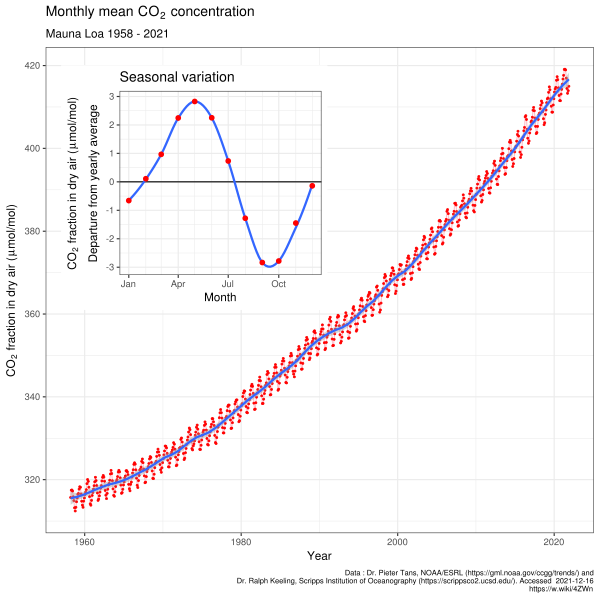

In [2]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading and cleaning a large data set in pandas

Load the data from the file "Mauna_Loa_CO2.csv" into a pandas dataframe named `Mauna_Loa_df` and display it. You should get a dataframe with 2494 rows and 9 columns with the first column looking as follows:
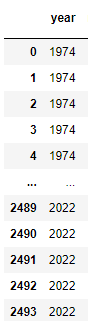

If you encounter difficulties doing this it may help to inspect the content of the csv file in a text editor.

In [3]:
#Load the Mauna_Loa_C02.csv file which is saved in Jupyter Notebook, and name each of the columns
Mauna_Loa_df=pd.read_csv("Mauna_Loa_CO2.csv",names=['year','month','day','decimal','average','ndays','1 year ago','10 years ago','increase since 1800'])  
#Drop all of the NaN rows, and drop the rows that contain unwanted strings. This cleans the data
Mauna_Loa_df_Clean=Mauna_Loa_df.copy().dropna().drop(index=[47])
#The indices have become inconsistent after the cleaning of the data, so reset the indices
# MachineLearningPlus,(2021) 'Pandas reset index – How to reset the index and convert the index to a column?'. Available at: https://www.machinelearningplus.com/pandas/pandas-reset-index/ (Accessed: 20 May 2021)
Mauna_Loa_df_Clean=Mauna_Loa_df_Clean.reset_index()
#An additional unwanted column called "index" appeared, so remove this column from the dataframe
Mauna_Loa_df_Clean=Mauna_Loa_df_Clean.drop(Mauna_Loa_df_Clean.columns[[0]],axis=1)
#Run the dataframe to observe its output
Mauna_Loa_df_Clean
#Also check the type of the data, to ensure that the output is in fact a dataframe
#type(Mauna_Loa_df_Clean)

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2489,2022,1,30,2022.0808,419.19,7,416.89,393.28,138.47
2490,2022,2,6,2022.1000,418.38,6,417.04,393.99,137.55
2491,2022,2,13,2022.1192,419.76,7,416.59,394.02,138.82
2492,2022,2,20,2022.1384,419.62,7,416.30,394.30,138.57


## Visualising data in matplotlib 
Using this dataframe, produce a plot of the carbon dioxide data contained therein versus time. The relevant columns in the csv file are "average" and "decimal", containing average carbon dioxide levels in ppm and the date in years, respectively. 

Clearly label the content, a plot simply showing the defaults "average" and "decimal" will be insufficient. 

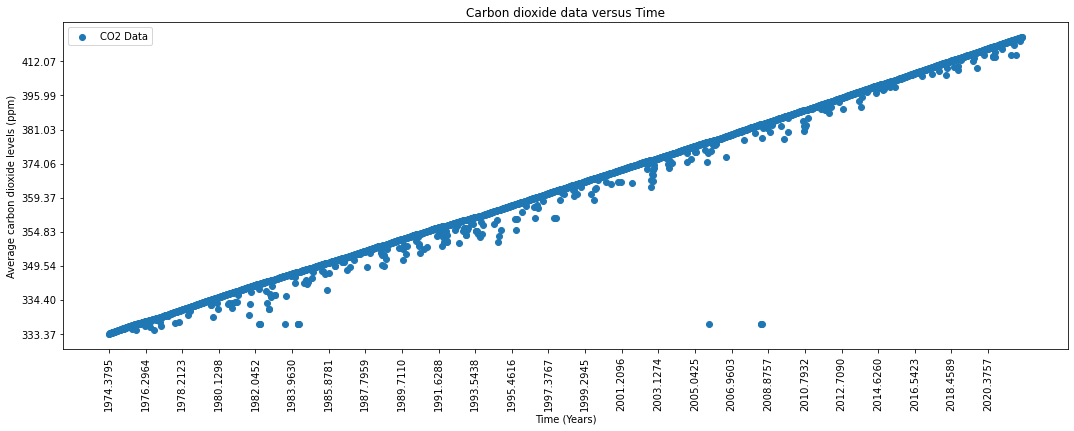

In [3]:
#Resize the figure so that it has a width of 18 and a height of 6
#This makes the graph easier to see
plt.figure(figsize=(18,6))
#Construct a list of x values from the data in the "decimal" column
#Construct a list of y values from the data in the "average" column
X_list=[x for x in Mauna_Loa_df_Clean["decimal"]]
Y_list=[y for y in Mauna_Loa_df_Clean["average"]]
#Plot a scatter plot of the data
#Add a label to the graph, so that other users know what the data represents
plt.scatter(X_list,Y_list,label= 'CO2 Data')
#Assign ax=plt.gca, as it will be used frequently for the next couple of lines
ax = plt.gca()
#Originally, there were too many years on the x axis, which made them very squashed together
#Hence, only display every 100th year tick
#Singh,S.(2020) 'Matplotlib.axes.Axes.set_xticks() in Python', Geeks for Geeks, 19 April. Available at:
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xticks-in-python/ (Accessed: 19 May 2020)
ax.set_xticks(ax.get_xticks()[::100])
#There were also too many ticks on the y-axis, so only display every 250th tick
ax.set_yticks(ax.get_yticks()[::250])
#Rotate the ticks on the x-axis by 90 degrees so that they are displayed vertically
#These changes make the ticks more readable
plt.xticks(rotation=90)
#Name the title of the graph
plt.title("Carbon dioxide data versus Time")
#Name the x-axis label
plt.xlabel("Time (Years)") 
#Name the y-axis label
plt.ylabel("Average carbon dioxide levels (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()




## Removing anomalies from a visualisation

---
In the above plot you will have noted irregularities, presumably due to missing data. Describe these and amend the dataframe accordingly. Replot.


---

        decimal average
0     1974.3795  333.37
1     1974.3986  332.95
2     1974.4178  332.35
3     1974.4370  332.20
4     1974.4562  332.37
...         ...     ...
2489  2022.0808  419.19
2490  2022.1000  418.38
2491  2022.1192  419.76
2492  2022.1384  419.62
2493  2022.1575  419.20

[2476 rows x 2 columns]


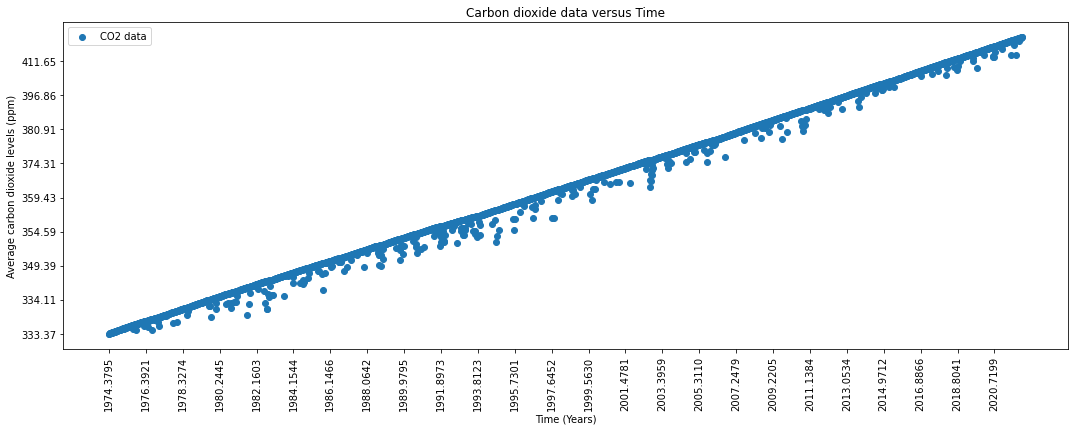

In [4]:
#By observing the graph above, we can see that there was a large drop in the average carbon dioxide levels
#This especially occurs around the years 2006 and 2008

#Drop all of the columns in the dataframe except for "decimal" and "average"
#We do this because only these two columns are relevant to this task
Relevant_data=Mauna_Loa_df_Clean.drop(['year','month','day','ndays','1 year ago','10 years ago','increase since 1800'], axis=1)
#Provide the set of relevant data between the years 2008 and 2009
#There are three anomolous results that have an average carbon dioxide level of -999.99pm
Relevant_data.loc[(Relevant_data["decimal"] >= '2008') & (Relevant_data["decimal"] <='2009')]
#Look for all of the relevant data that has an average carbon dioxide level of -999.99 ppm
Relevant_data.loc[Relevant_data["average"] == "-999.99"]
#Manually drop the rows associated to irregular data points from the dataframe (by reference to their indices)
Amended_data=Relevant_data.drop([72,81,82,83,84,110,409,412,413,481,515,516,517,518,1639,1780,1781,1782],axis=0)
#Displays the dataframe without the irregular data values
print(Amended_data)


#Now replot the graph
#Resize the figure so that it has a width of 18 units and a height of 16 units
#This makes the graph easier to see
plt.figure(figsize=(18,6))
#Construct a list of x values from the data in the "decimal" column
#Construct a list of y values from the data in the "average" column
X_list2=[x for x in Amended_data["decimal"]]
Y_list2=[y for y in Amended_data["average"]]
#Create a scatter plot using the data of X_list2 and Y_list2
#Label the data, so that other users know what the data represents
plt.scatter(X_list2,Y_list2, label= 'CO2 data')
#Assign ax=plt.gca(), as it will be used for the next few lines of code
ax = plt.gca()
#Originally, there were too many years on the x axis, which made them very squashed together 
#Hence only display every 100th year tick
ax.set_xticks(ax.get_xticks()[::100])
#There were also too many ticks on the y-axis, so only display every 250th tick
ax.set_yticks(ax.get_yticks()[::250])
#Rotate the ticks on the x-axis by 90 degrees so that they are written vertically
#These changes make the ticks more readable
plt.xticks(rotation=90)
#Name the title of the graph
plt.title("Carbon dioxide data versus Time")
#Name the x-axis label
plt.xlabel("Time (Years)") 
#Name the y-axis label
plt.ylabel("Average carbon dioxide levels (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()

#I now observe that the graph has a closer resemblance to a straight line
#I also observe that the irregular data points from the original dataframe have been removed from the graph


#(Note: Throughout this section I have updated the name of my dataframe to make it easier to keep track of the changes
#that I implemented. I now name the cleanest form of my dataframe "Mauna_Loa_df", to keep consistent with the naming
#preferences used for the rest of this exam paper).
Mauna_Loa_df=Amended_data